# Análisis exploratorio de datos
---


In [192]:
import numpy as np
import pandas as pd
# Graficos
import matplotlib.pyplot as plt
import seaborn as sns
# Mapas
import cartopy.crs as ccrs
import matplotlib.colors as colors
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
# Transformacion de datos
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
sns.set_theme()

In [90]:
# En caso de no tener funcional cartopy.feature usamos estas lineas
# !wget https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
# !python cartopy_feature_download.py physical
# !python cartopy_feature_download.py cultural

--2023-06-13 15:40:47--  https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6332 (6,2K) [text/plain]
Saving to: ‘cartopy_feature_download.py’

cartopy_feature_dow 100%[===================>]   6,18K  --.-KB/s    in 0s      

2023-06-13 15:40:48 (142 MB/s) - ‘cartopy_feature_download.py’ saved [6332/6332]

/home/mofoko/anaconda3/envs/oceanenv/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
Feature physical, coastline, 110m length: 134
Feature physic

In [2]:
db12_prep = pd.read_csv('/home/mofoko/Documents/Metodologias/tdsp_template/scripts/data_acquisition/db12_prep.csv')
db12_prep

,q,lat,lng,elevation,A_dom,A_reg,A_cont,A_year,sedthick
0,201.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977
1,214.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977
2,46.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000
3,57.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000
4,176.0,-39.9900,-109.8550,-3194.4,marine,South Pacific Ocean,Antarctic Plate,2008,17.999983
...,...,...,...,...,...,...,...,...,...
30926,19.0,24.9000,122.7000,-1542.0,marine,East China Sea,Eurasian Plate - Asia,2019,1872.397949
30927,8.0,24.9200,122.7000,-1464.0,marine,East China Sea,Eurasian Plate - Asia,2019,1872.397949
30928,12.0,24.9400,122.7000,-1478.0,marine,East China Sea,Eurasian Plate - Asia,2019,1872.397949
30929,54.0,24.9600,122.7000,-1462.0,marine,East China Sea,Eurasian Plate - Asia,2019,2009.021484


## Definimos tipos de variables
---

In [68]:
# Definimos las variables categoricas
categorical = ['A_dom', 'A_reg', 'A_cont'] 
# Definimos las variables numericas
numeric = ['q', 'elevation', 'sedthick']
# Variables geoespaciales
coords = ['lat', 'lng']
temporal = 'A_year'

## Análisis Global
---
Inicialmente se realizará una exploración global. 

### Relaciones entre datos
---

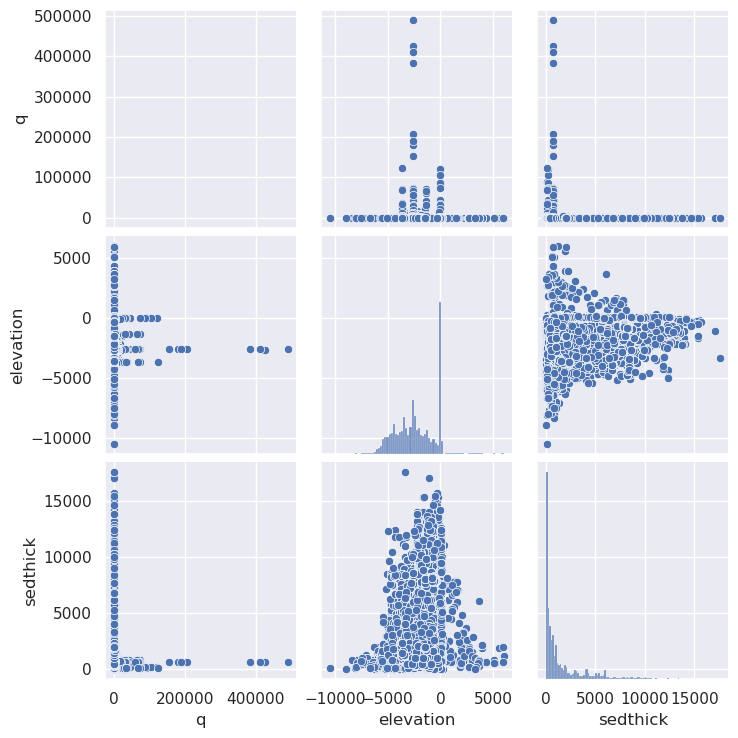

In [69]:
# Genera un pair plot para las columnas numéricas del DataFrame db12_prep
sns.pairplot(db12_prep[numeric])

/tmp/ipykernel_116367/1801107653.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = db12_prep.corr(method='spearman')


Text(0.5, 1.0, 'Matriz de correlacion')

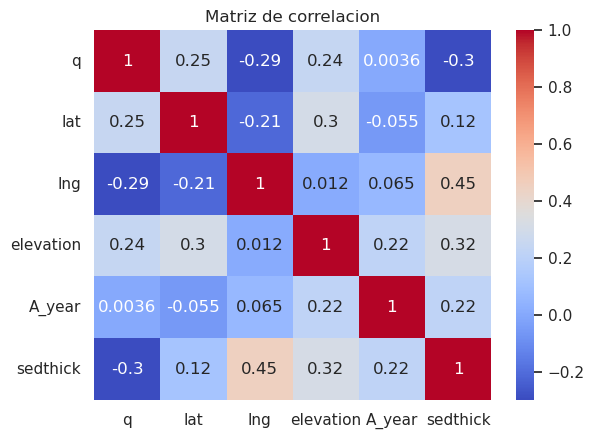

In [190]:
# Calcular la matriz de correlación utilizando el coeficiente de Spearman
correlation_matrix = db12_prep.corr(method='spearman')
# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlacion')

### Calidad de los datos
---

Text(0, 0.5, 'N')

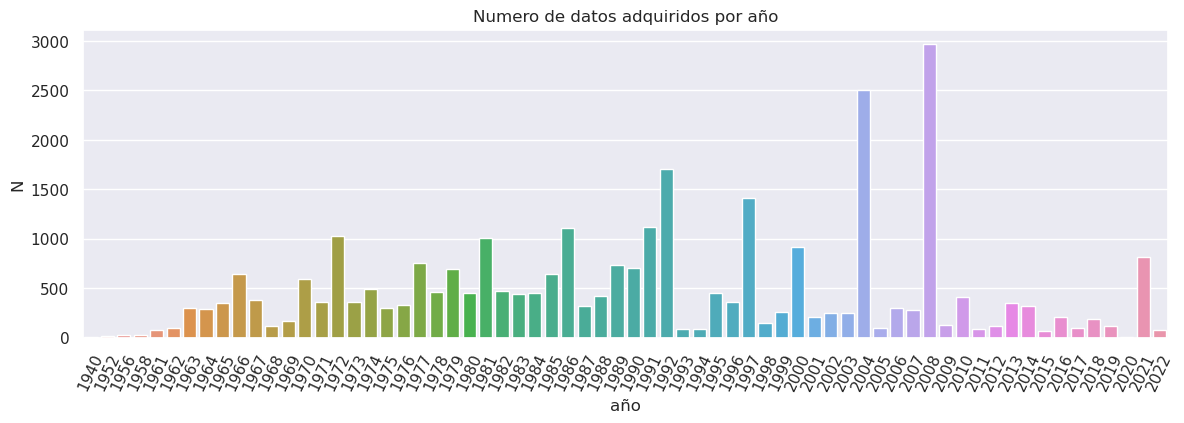

In [71]:
# Agrupar los datos por ano y contar la frecuencia
time_series_frec = db12_prep.groupby(temporal).size()
# Crear el gráfico de barras por ano
plt.figure(figsize=(14, 4))
sns.barplot(x=time_series_frec.index, y=time_series_frec.values)
# Rotar las etiquetas de los ticks del eje x
plt.xticks(rotation=65)
# Personalizar el gráfico
plt.title('Numero de datos adquiridos por año')
plt.xlabel('año')
plt.ylabel('N')

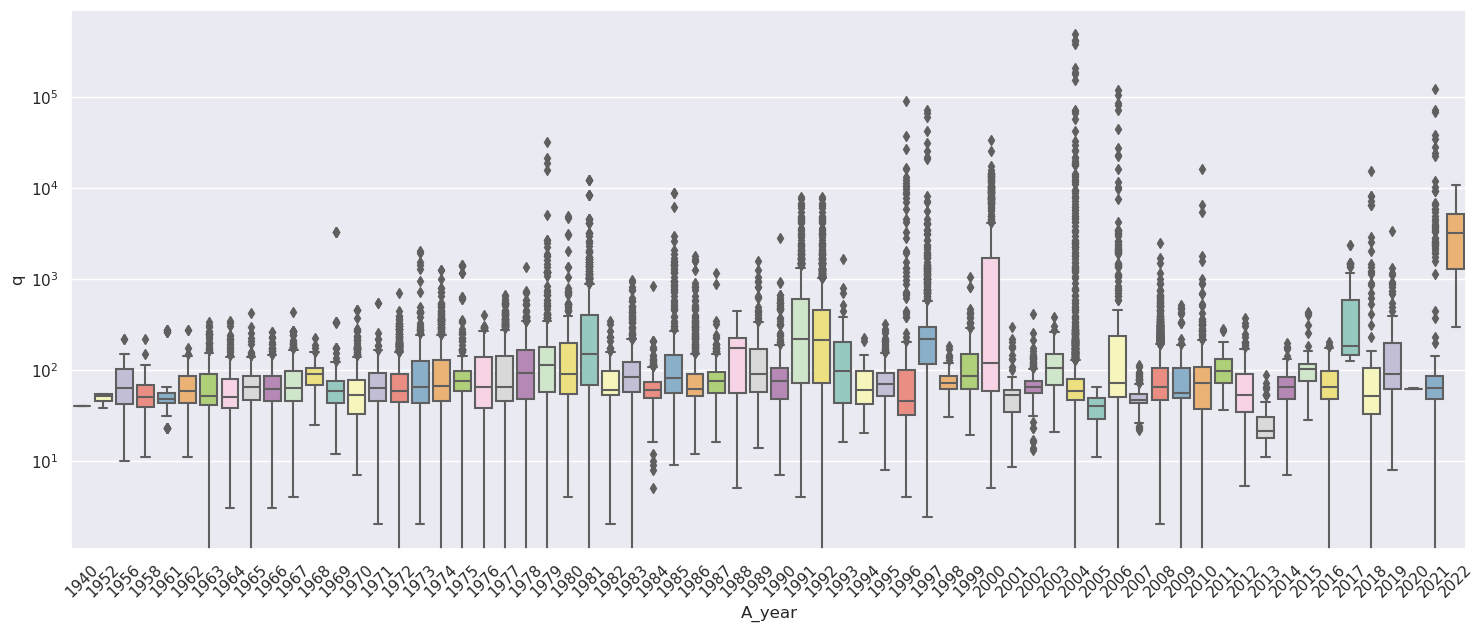

In [72]:
# Crear una figura con un tamaño personalizado (18 pulgadas de ancho, 7 pulgadas de alto)
fig = plt.figure(figsize=(18,7))
# Generar un gráfico de caja utilizando los datos de db12_prep
sns.boxplot(x=temporal, y="q",
                 data=db12_prep, 
                 palette="Set3")
# Rotar las etiquetas del eje x
plt.xticks(rotation=45);
# Configurar el gráfico en escala logarítmica en el eje y
plt.yscale('log')

Text(0, 0.5, 'N')

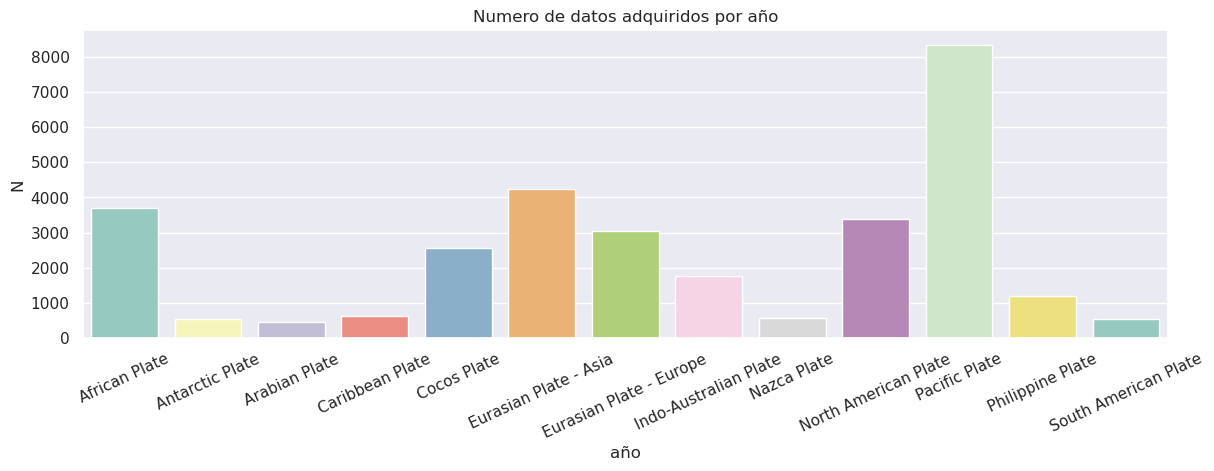

In [59]:
# Agrupar los datos por ano y contar la frecuencia
cont_frec = db12_prep.groupby('A_cont').size()
# Crear el gráfico de barras por ano
plt.figure(figsize=(14, 4))
sns.barplot(x=cont_frec.index, y=cont_frec.values, 
                 palette="Set3",)
# Rotar las etiquetas de los ticks del eje x
plt.xticks(rotation=25)
# Personalizar el gráfico
plt.title('Numero de datos adquiridos por año')
plt.xlabel('año')
plt.ylabel('N')

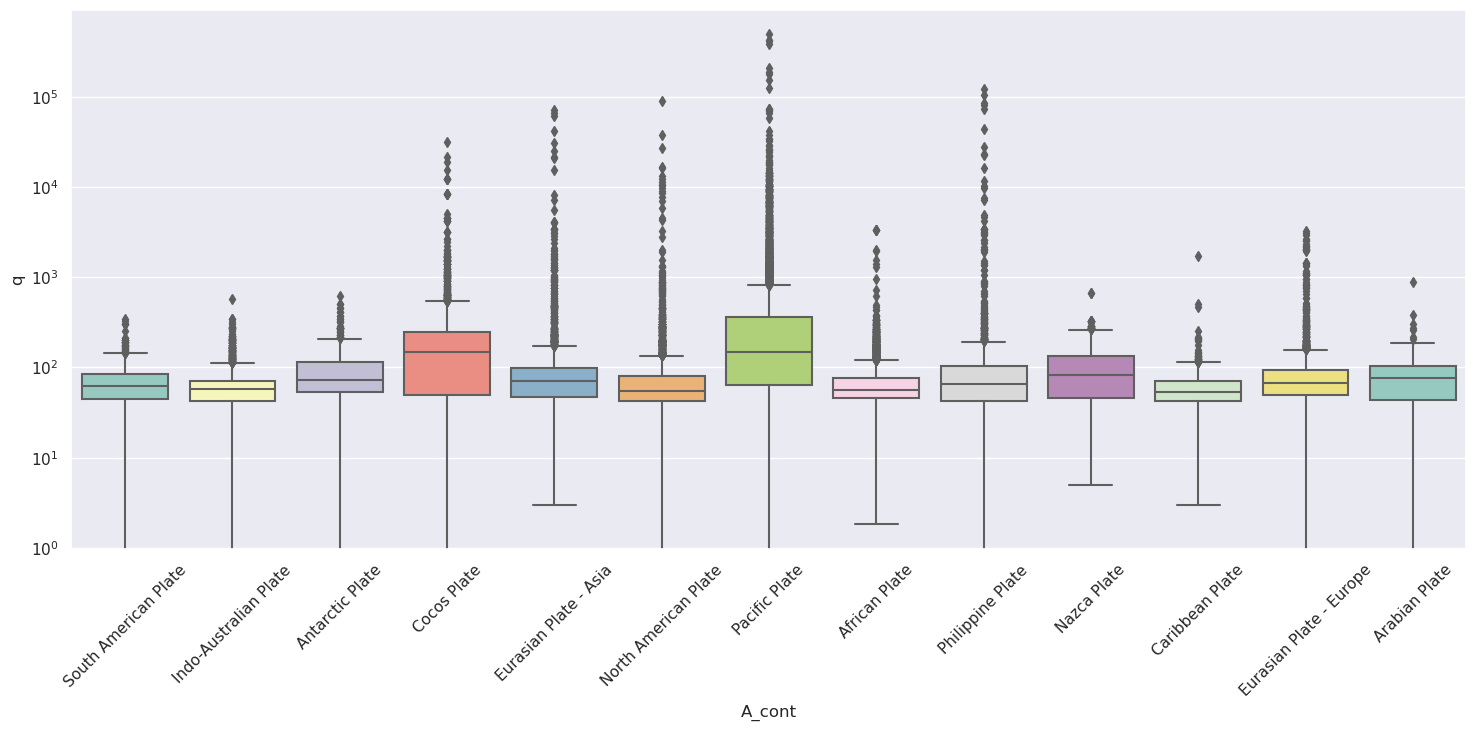

In [58]:
# Crear una figura con un tamaño personalizado 
fig = plt.figure(figsize=(18,7))
# Generar un gráfico de caja utilizando los datos de db12_prep
sns.boxplot(x="A_cont", y="q",
                 data=db12_prep, 
                 palette="Set3")
# Configurar el gráfico en escala logarítmica en el eje y
plt.yscale('log')
# Rotar las etiquetas del eje x
plt.xticks(rotation=45);

Text(0, 0.5, 'N')

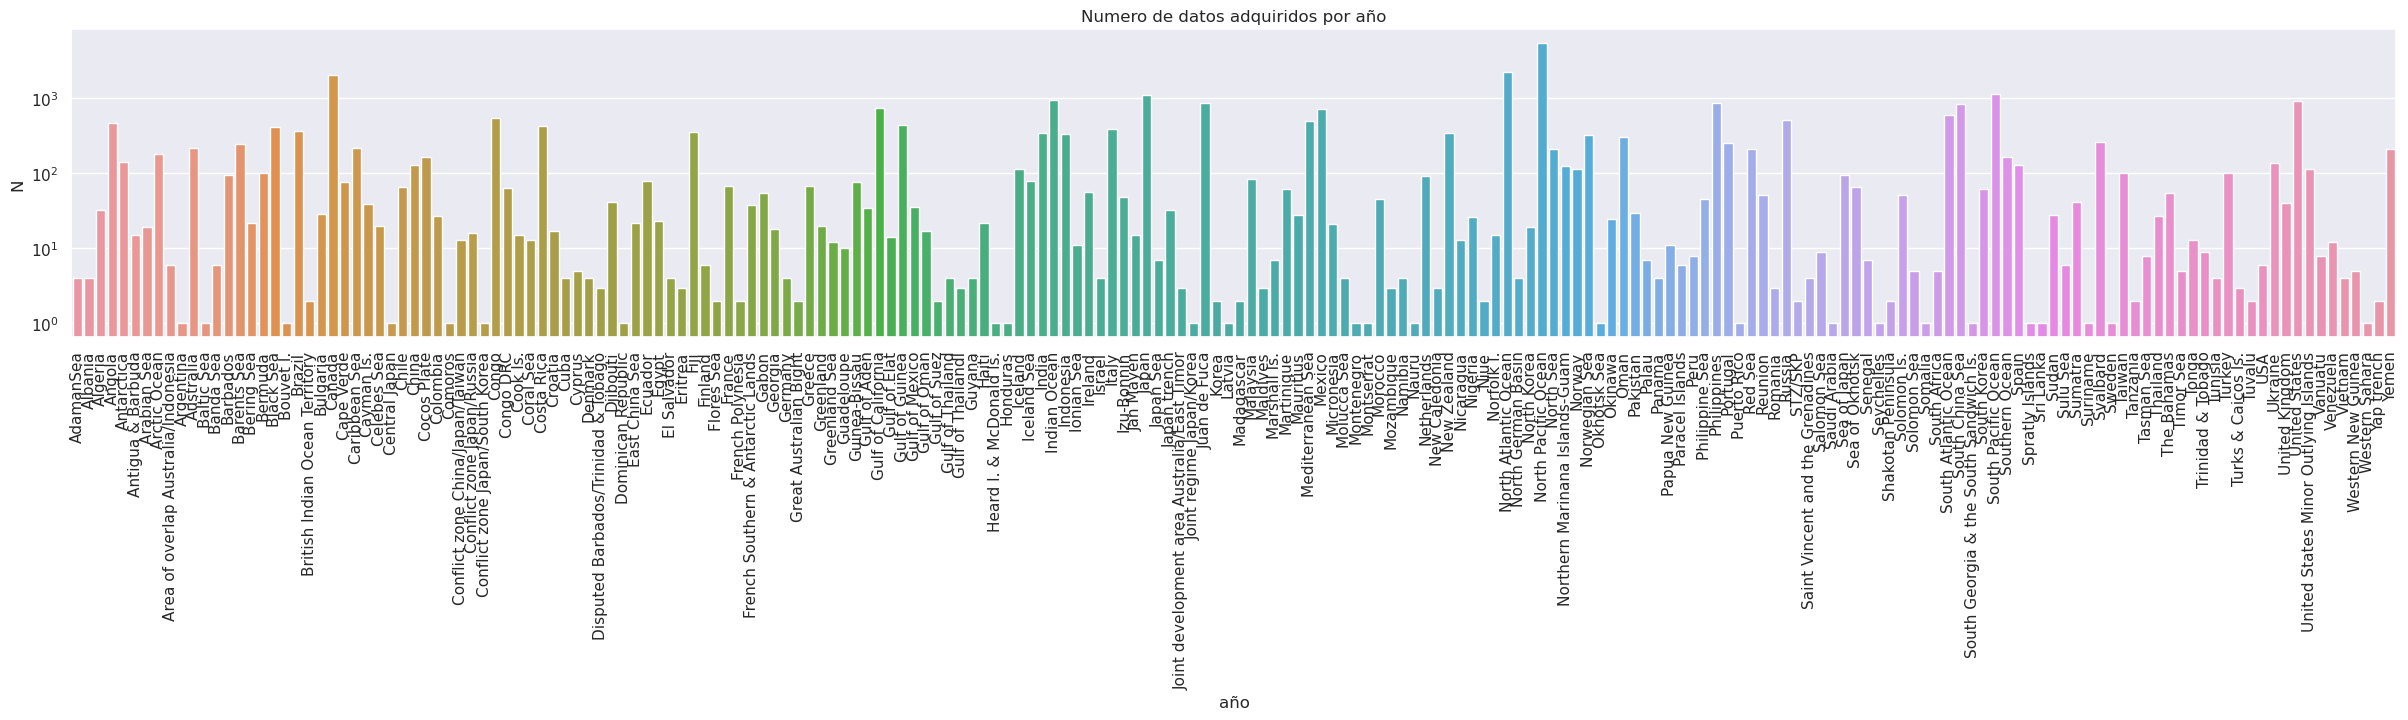

In [64]:
# Agrupar los datos por ano y contar la frecuencia
reg_frec = db12_prep.groupby('A_reg').size()
# Crear el gráfico de barras por ano
plt.figure(figsize=(30, 4))
sns.barplot(x=reg_frec.index, y=reg_frec.values)
# Rotar las etiquetas de los ticks del eje x
plt.xticks(rotation=90)
# Configurar el gráfico en escala logarítmica en el eje y
plt.yscale('log')
# Personalizar el gráfico
plt.title('Numero de datos adquiridos por año')
plt.xlabel('año')
plt.ylabel('N')

/home/mofoko/anaconda3/envs/oceanenv/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/mofoko/anaconda3/envs/oceanenv/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Text(0.5, 1.0, 'Mapa de datos de flujo de calor')

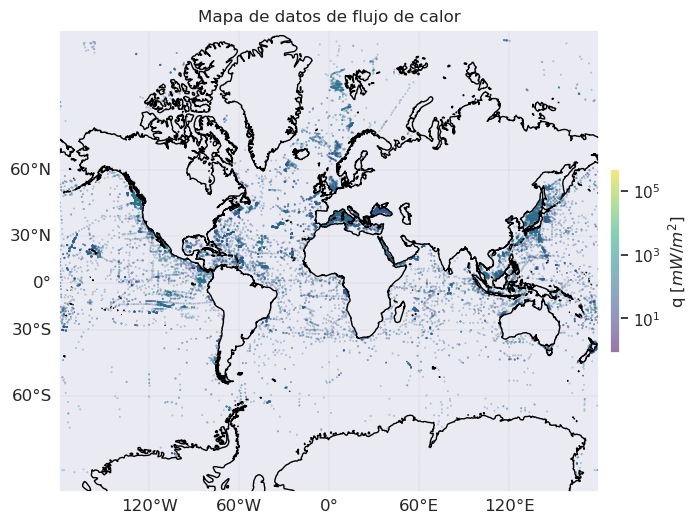

In [81]:
# Crear una figura y un eje utilizando la proyección cartopy
fig = plt.figure(figsize=(14, 6))
# Definimos el codigo de proyeccion
epsg_code = 3395
# Definimos el sistema de referencia proyectado en ax
ax = plt.axes(projection=ccrs.epsg(epsg_code))
# Trazar los puntos en el mapa utilizando scatter
scater_map = ax.scatter(db12_prep['lng'], db12_prep['lat'], c=db12_prep['q'], 
           cmap='viridis', norm=colors.LogNorm(), s=0.1, alpha=0.5, transform=ccrs.PlateCarree())
# Agregar barra de colores
cbar = plt.colorbar(scater_map, label=r'q [$mW/m^2$]', pad=0.01, shrink=0.4)
# Agregar características del mapa, como la costa y los límites del país
ax.coastlines(resolution='50m')
# Agrega reticula
gl = ax.gridlines(draw_labels=True, linewidth=0.1, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
# Titulo
ax.set_title('Mapa de datos de flujo de calor')

### Análisis de datos anómalos
---
Inspeccionamos la existencia de valore anómalos

In [145]:
# Cantidad de valores negativos de grosor sedimentario
db12_prep[db12_prep['sedthick']<0].count()[-1:]

sedthick    0
dtype: int64

In [142]:
# Cantidad de valores negativos de flujo de calor
db12_prep[db12_prep['q']<0].count()[0:1]

q    47
dtype: int64

In [136]:
# Excluimos los datos de flujo de calor negativos
db12_prep_exclud = db12_prep[db12_prep['q']>0]
db12_prep_exclud

,q,lat,lng,elevation,A_dom,A_reg,A_cont,A_year,sedthick
0,201.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977
1,214.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977
2,46.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000
3,57.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000
4,176.0,-39.9900,-109.8550,-3194.4,marine,South Pacific Ocean,Antarctic Plate,2008,17.999983
...,...,...,...,...,...,...,...,...,...
30926,19.0,24.9000,122.7000,-1542.0,marine,East China Sea,Eurasian Plate - Asia,2019,1872.397949
30927,8.0,24.9200,122.7000,-1464.0,marine,East China Sea,Eurasian Plate - Asia,2019,1872.397949
30928,12.0,24.9400,122.7000,-1478.0,marine,East China Sea,Eurasian Plate - Asia,2019,1872.397949
30929,54.0,24.9600,122.7000,-1462.0,marine,East China Sea,Eurasian Plate - Asia,2019,2009.021484


Es posible determinar que hay valores de flujo anómalos presentando valores muy altos de flujo de calor muy alejados de la media.

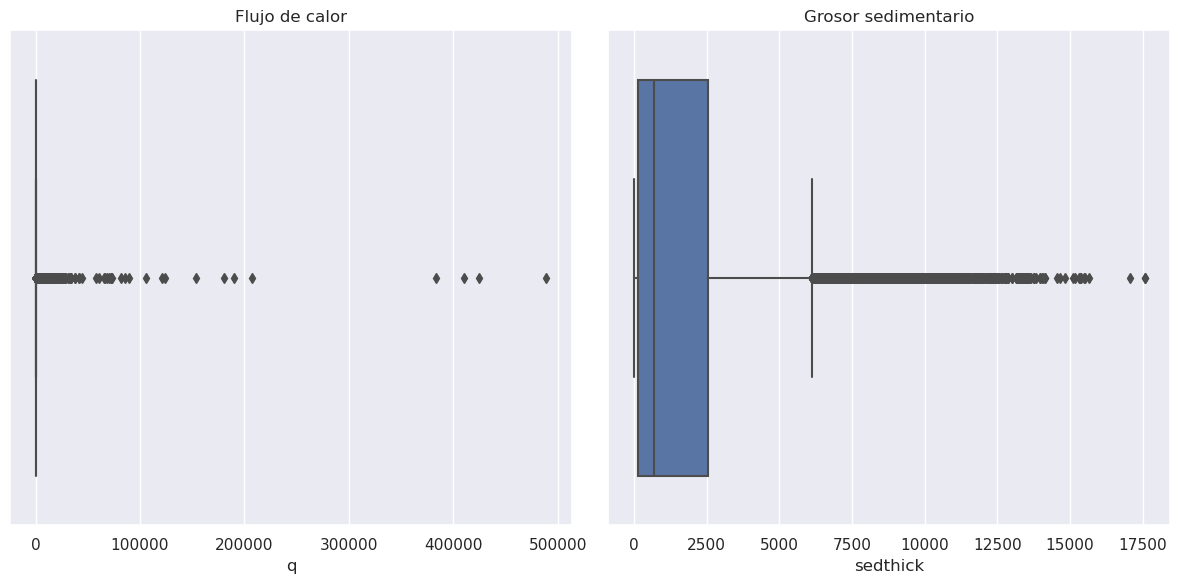

In [147]:
# Crear una figura con subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Diagrama de caja para variable1 en el primer subplot
sns.boxplot(x=db12_prep_exclud['q'], ax=axes[0])
axes[0].set_title('Flujo de calor')
# Diagrama de caja para variable2 en el segundo subplot
sns.boxplot(x=db12_prep_exclud['sedthick'], ax=axes[1])
axes[1].set_title('Grosor sedimentario')
# Ajustar el espaciado entre los subplots
plt.tight_layout()

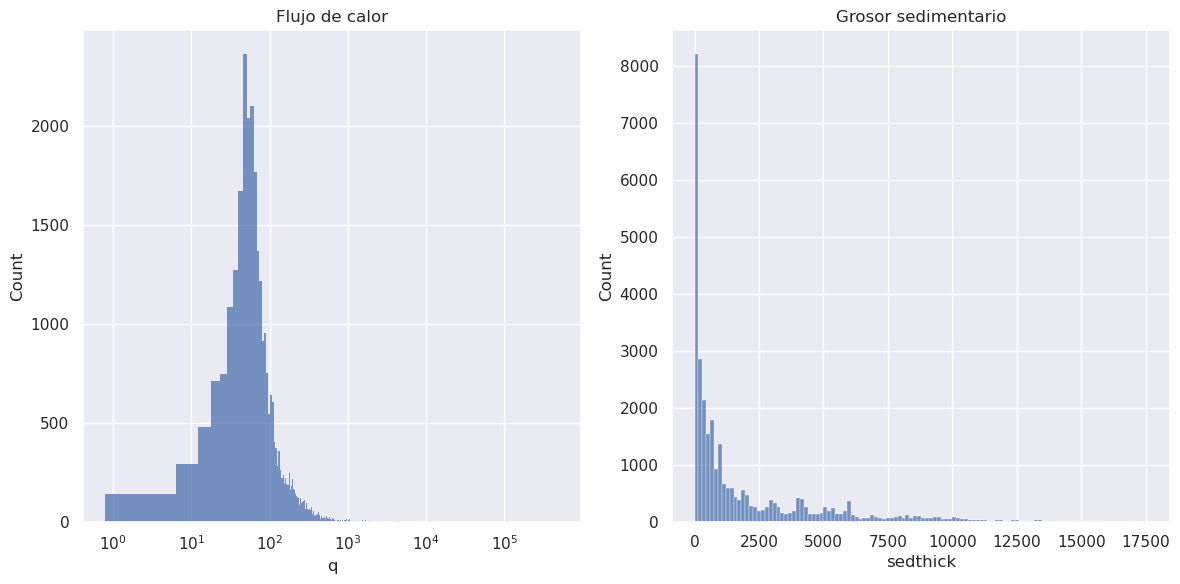

In [168]:
# Crear una figura con subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Diagrama de caja para variable1 en el primer subplot
sns.histplot(x=db12_prep_exclud['q'], ax=axes[0])
axes[0].set_title('Flujo de calor')
# Configurar el gráfico en escala logarítmica en el eje y
axes[0].set_xscale('log')
# Diagrama de caja para variable2 en el segundo subplot
sns.histplot(x=db12_prep_exclud['sedthick'], ax=axes[1])
axes[1].set_title('Grosor sedimentario')
# Ajustar el espaciado entre los subplots
plt.tight_layout()

Procedemos a eliminar los valors anómalos de flujo de calor utilizando una normalización z-score y un valor umbral.

In [160]:
# Crear una instancia de StandardScaler
scaler = StandardScaler()
# Ajustar y transformar los datos utilizando StandardScaler
column_scaled = scaler.fit_transform(db12_prep_exclud['q'].values.reshape(-1, 1))
# Umbral
umbral = 3
# Calculamos los valores anomalos (fuera del umbral)
print(f'N valores anomalos: {(abs(column_scaled)>umbral).sum()}')
# Excluimos los valores anomalos
db12_prep_exclud_sinanomal = db12_prep_exclud[abs(column_scaled)<umbral]
db12_prep_exclud_sinanomal

N valores anomalos: 58


,q,lat,lng,elevation,A_dom,A_reg,A_cont,A_year,sedthick
0,201.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977
1,214.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977
2,46.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000
3,57.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000
4,176.0,-39.9900,-109.8550,-3194.4,marine,South Pacific Ocean,Antarctic Plate,2008,17.999983
...,...,...,...,...,...,...,...,...,...
30926,19.0,24.9000,122.7000,-1542.0,marine,East China Sea,Eurasian Plate - Asia,2019,1872.397949
30927,8.0,24.9200,122.7000,-1464.0,marine,East China Sea,Eurasian Plate - Asia,2019,1872.397949
30928,12.0,24.9400,122.7000,-1478.0,marine,East China Sea,Eurasian Plate - Asia,2019,1872.397949
30929,54.0,24.9600,122.7000,-1462.0,marine,East China Sea,Eurasian Plate - Asia,2019,2009.021484


Realizamos el mismo proceso para los datos de grosor sedimentario.

In [171]:
# Crear una instancia de StandardScaler
scaler = StandardScaler()
# Ajustar y transformar los datos utilizando StandardScaler
column_scaled = scaler.fit_transform(db12_prep_exclud_sinanomal['sedthick'].values.reshape(-1, 1))
# Umbral
umbral = 3
# Calculamos los valores anomalos (fuera del umbral)
print(f'N valores anomalos: {(abs(column_scaled)>umbral).sum()}')
# Excluimos los valores anomalos
db12_prep_exclud_sinanomal_sinanomal = db12_prep_exclud_sinanomal[abs(column_scaled)<umbral]
db12_prep_exclud_sinanomal_sinanomal

N valores anomalos: 721


,q,lat,lng,elevation,A_dom,A_reg,A_cont,A_year,sedthick
0,201.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977
1,214.0,-16.0733,-17.2717,-3855.9,marine,South Atlantic Ocean,South American Plate,2008,85.999977
2,46.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000
3,57.0,-0.9917,81.3983,-4720.3,marine,Indian Ocean,Indo-Australian Plate,2008,1756.000000
4,176.0,-39.9900,-109.8550,-3194.4,marine,South Pacific Ocean,Antarctic Plate,2008,17.999983
...,...,...,...,...,...,...,...,...,...
30926,19.0,24.9000,122.7000,-1542.0,marine,East China Sea,Eurasian Plate - Asia,2019,1872.397949
30927,8.0,24.9200,122.7000,-1464.0,marine,East China Sea,Eurasian Plate - Asia,2019,1872.397949
30928,12.0,24.9400,122.7000,-1478.0,marine,East China Sea,Eurasian Plate - Asia,2019,1872.397949
30929,54.0,24.9600,122.7000,-1462.0,marine,East China Sea,Eurasian Plate - Asia,2019,2009.021484


### Transformación de los datos
---


<Axes: xlabel='sedthick', ylabel='q'>

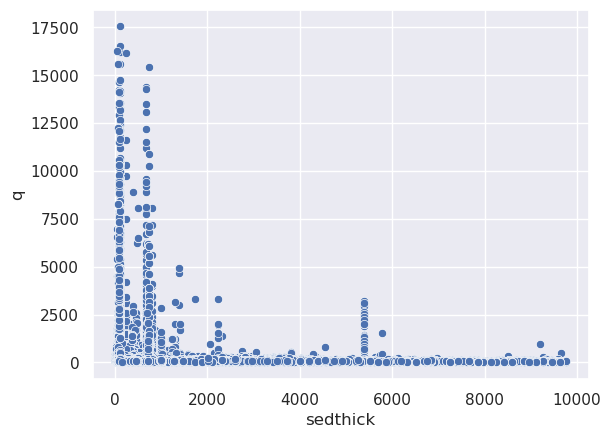

In [172]:
# Crear un gráfico de dispersión de 'sedthick' vs 'q'
sns.scatterplot(x=db12_prep_exclud_sinanomal_sinanomal['sedthick'], 
                y=db12_prep_exclud_sinanomal_sinanomal['q'])

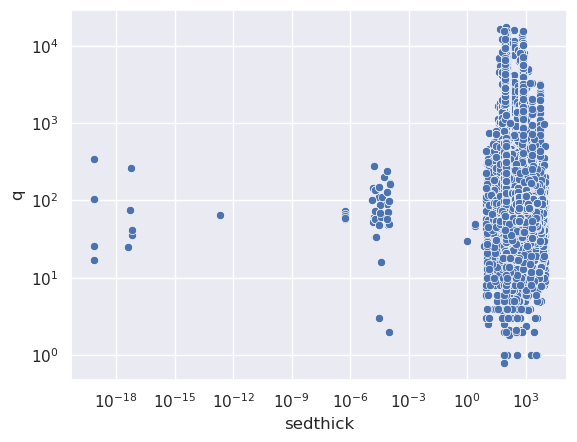

In [173]:
# Crear un gráfico de dispersión de 'sedthick' vs 'q' en escala logarítmica
sns.scatterplot(x=db12_prep_exclud_sinanomal_sinanomal['sedthick'], 
                y=db12_prep_exclud_sinanomal_sinanomal['q'])
plt.xscale('log')
plt.yscale('log')

Las transformadas de potencia son una familia de transformaciones paramétricas y monotónicas cuyo objetivo es asignar datos de cualquier distribución a una distribución lo más parecida posible a la de Gauss.

In [ ]:
# Crear una instancia del escalador PowerTransformer utilizando el método 'yeo-johnson'
pt = PowerTransformer(method='yeo-johnson')
# Ajustar y transformar la columna 'q' utilizando el escalador
column_scaled_y = (pt.fit_transform(db12_prep_exclud_sinanomal_sinanomal['q']
                                        .values.reshape(-1, 1)).squeeze()
                                        )
# Ajustar y transformar la columna 'sedthick' utilizando el escalador
column_scaled_x = (pt.fit_transform(db12_prep_exclud_sinanomal_sinanomal['sedthick']
                                       .values.reshape(-1, 1)).squeeze()
                                       )

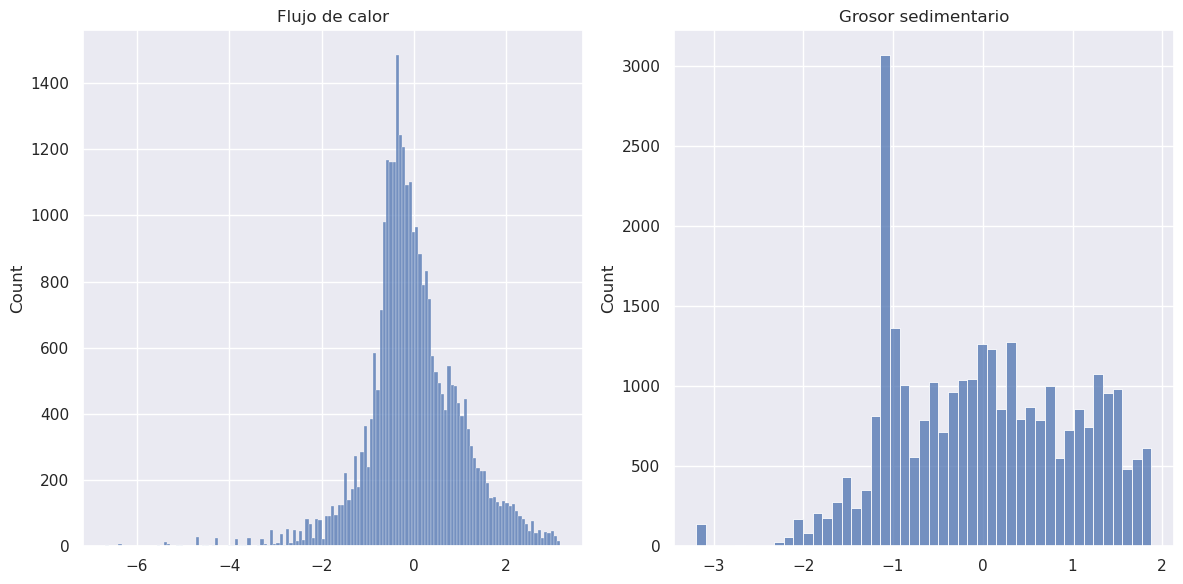

In [193]:
# Crear una figura con subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Diagrama de caja para variable1 en el primer subplot
sns.histplot(x=column_scaled_y, ax=axes[0])
axes[0].set_title('Flujo de calor')
# Diagrama de caja para variable2 en el segundo subplot
sns.histplot(x=column_scaled_x, ax=axes[1])
axes[1].set_title('Grosor sedimentario')
# Ajustar el espaciado entre los subplots
plt.tight_layout()

Text(0.5, 0, 'Grosor sedimentario $x_i^\\lambda$')

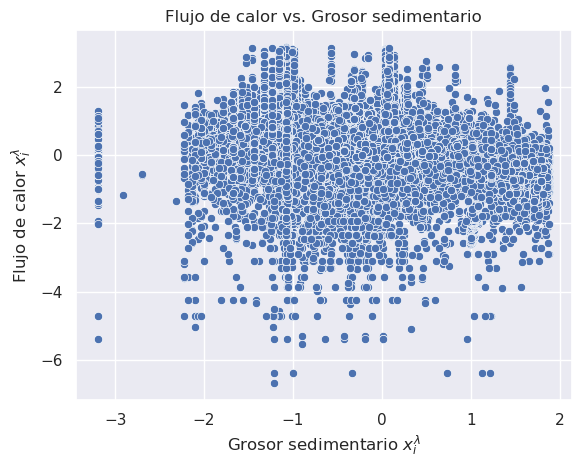

In [187]:
# Crear un gráfico de dispersión de las variables escaladas
sns.scatterplot(x=column_scaled_x, y=column_scaled_y)
# Configurar el título y etiquetas de los ejes
plt.title('Flujo de calor vs. Grosor sedimentario')
plt.ylabel(r'Flujo de calor $x_i^\lambda$')
plt.xlabel(r'Grosor sedimentario $x_i^\lambda$')

Text(0.5, 1.0, 'Matriz de correlacion')

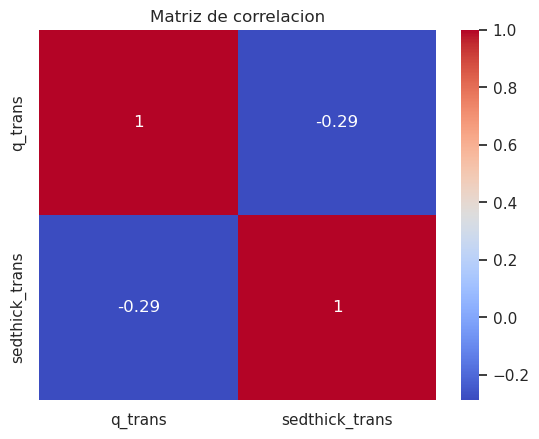

In [191]:
# Crear un DataFrame de ejemplo
data = {'q_trans': column_scaled_y,
        'sedthick_trans': column_scaled_x,
        }
df_data_trans = pd.DataFrame(data)
# Calcular la matriz de correlación utilizando el coeficiente de Spearman
correlation_matrix = df_data_trans.corr(method='spearman')
# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlacion')

Text(0.5, 1.0, 'Correlación q_trans vs. sedthick_trans')

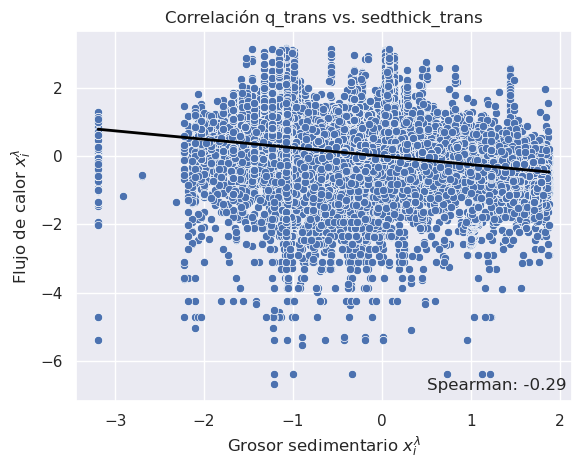

In [216]:
# Añadir la línea de tendencia y el coeficiente de correlación de Spearman
sns.regplot(x='sedthick_trans', y='q_trans', data=df_data_trans, 
            scatter=False, color='black', line_kws={'linewidth': 2})
# Add scatter plot with different color
sns.scatterplot(x='sedthick_trans', y='q_trans', data=df_data_trans)
spearman_corr = df_data_trans['sedthick_trans'].corr(df_data_trans['q_trans'], method='spearman')
plt.text(0.5, -6.5, f'Spearman: {spearman_corr:.2f}', 
         ha='left', va='top', fontsize=12)

# Configurar etiquetas y título
plt.xlabel(r'Grosor sedimentario $x_i^\lambda$')
plt.ylabel(r'Flujo de calor $x_i^\lambda$')
plt.title('Correlación q_trans vs. sedthick_trans')

### Guardamos y versionamos los datos
---
Guardamos y versionados los datos transformados y explorados

In [217]:
df_data_trans.to_csv('/home/mofoko/Documents/Metodologias/tdsp_template/scripts/data_acquisition/db12_trans.csv')
db12_prep_exclud_sinanomal_sinanomal.to_csv('/home/mofoko/Documents/Metodologias/tdsp_template/scripts/data_acquisition/db12_prep_eda.csv')

In [218]:
!cd /home/mofoko/Documents/Metodologias/tdsp_template/scripts/data_acquisition && ls -a && dvc add db12_trans.csv && ls -a
!cd /home/mofoko/Documents/Metodologias/tdsp_template/scripts/data_acquisition && ls -a && dvc add db12_prep_eda.csv && ls -a

.		   get_data.py	      IHFC_2023_GHFDB.csv
..		   .gitignore	      IHFC_2023_GHFDB.csv.dvc
db12_prep.csv	   GlobSed-v3.nc      IHFC_2023_GHFDB_pre.csv
db12_prep.csv.dvc  GlobSed-v3.nc.dvc  IHFC_2023_GHFDB_pre.csv.dvc
db12_prep_eda.csv  GlobSed.zip
db12_trans.csv	   GlobSed.zip.dvc
⠋ Checking graph                                                 
Adding...                                                                       
!
  0% Checking cache in '/home/mofoko/Documents/Metodologias/tdsp_template/.dvc/c
                                                                                
!
  0%|          |Transferring                          0/? [00:00<?,     ?file/s]
  0%|          |Transferring                          0/1 [00:00<?,     ?file/s]
                                                                                
!
  0%|          |Checking out db12_trans.csv           0/? [00:00<?,    ?files/s]
  0%|          |Checking out db12_trans.csv           0/1 [00:00<?,    ?files/